In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data.csv")

In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

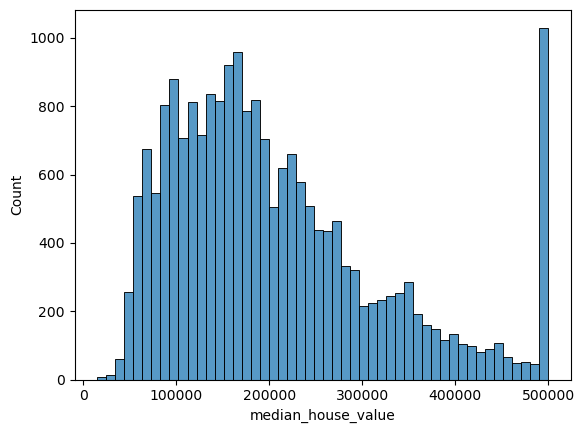

In [10]:
sns.histplot(df.median_house_value, bins=50)

In [16]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [19]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [22]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [26]:
df['population'].median()

1195.0

In [27]:
np.random.seed(42)
n = len(df)

In [28]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [29]:
n, n_val + n_test + n_train

(15687, 15687)

In [30]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [31]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [34]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [36]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12446,33.82,-114.98,15.0,644.0,129.0,137.0,52.0,3.2097
11950,33.94,-117.44,30.0,2992.0,516.0,1521.0,507.0,3.9128
12395,33.72,-116.33,11.0,12327.0,2000.0,2450.0,1139.0,7.4382
12701,38.60,-121.41,16.0,5407.0,1467.0,2523.0,1265.0,2.0471
15613,32.61,-116.79,19.0,2652.0,520.0,1421.0,491.0,3.5227
...,...,...,...,...,...,...,...,...
7363,33.97,-118.20,28.0,2474.0,702.0,2830.0,694.0,2.7540
3740,34.17,-118.39,26.0,3345.0,818.0,1599.0,773.0,3.3516
10280,33.88,-117.81,19.0,2968.0,503.0,1430.0,459.0,5.3339
1080,39.73,-121.84,52.0,677.0,152.0,379.0,154.0,1.6797


In [61]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [62]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

In [63]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:

X_train_0 = prepare_X(df_train)

In [67]:
w_0, w = train_linear_regression(X_train_0, y_train)

In [70]:
y_pred = w_0 + X_train_0.dot(w)

In [71]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [72]:

rmse(y_train, y_pred)

0.3402621765185623

In [77]:
mean_total_bedrooms = df_train['total_bedrooms'].mean()

In [78]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_train.fillna({'total_bedrooms': mean_total_bedrooms})
    X = df_num.values
    return X


X_train_mean = prepare_X(df_train)
w_0, w = train_linear_regression(X_train_mean, y_train)
y_pred = w_0 + X_train_0.dot(w)
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

0.3404207553409414